# Introduction to TensorFlow, now leveraging tensors!

In this notebook, we modify our [intro to TensorFlow notebook](https://github.com/the-deep-learners/TensorFlow-LiveLessons/blob/master/notebooks/point_by_point_intro_to_tensorflow.ipynb) to use tensors in place of our *for* loop. This is a derivation of Jared Ostmeyer's [Naked Tensor](https://github.com/jostmey/NakedTensor/) code. 

#### The initial steps are identical to the earlier notebook

In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] 
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.] 

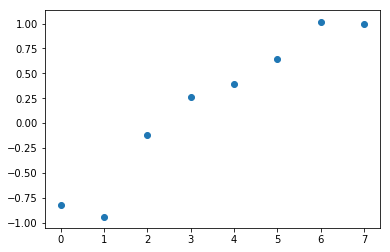

In [3]:
fig, ax = plt.subplots()
_ = ax.scatter(xs, ys)

In [4]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

#### Define the cost as a tensor -- more elegant than a *for* loop and enables distributed computing in TensorFlow

In [5]:
ys_model = m*xs+b
total_error = tf.reduce_sum((ys-ys_model)**2) # use an op to calculate SSE across all values instead of one by one

#### The remaining steps are also identical to the earlier notebook!

In [6]:
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error)

In [7]:
initializer_operation = tf.global_variables_initializer()

In [38]:
with tf.Session() as session:
    
    session.run(initializer_operation)
    
    n_epochs = 1000 # 10, then 1000
    for iteration in range(n_epochs):
        session.run(optimizer_operation)
        
    slope, intercept = session.run([m, b])

In [39]:
slope

0.29314372

In [40]:
intercept

-0.84175235

In [41]:
y_hat = intercept + slope*np.array(xs)

In [42]:
pd.DataFrame(list(zip(ys, y_hat)), columns=['y', 'y_hat'])

,y,y_hat
0,-0.82,-0.841752
1,-0.94,-0.548609
2,-0.12,-0.255465
3,0.26,0.037679
4,0.39,0.330823
5,0.64,0.623966
6,1.02,0.917110
7,1.00,1.210254


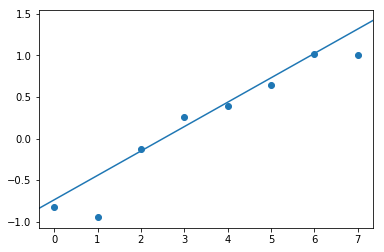

In [43]:
fig, ax = plt.subplots()

ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max-x_min)

ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])